In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import minkowski
from scipy.stats import mode

# K Nearest Neighbour Classifier Implementation

In [168]:
class KNNClassifier:
    def __init__(self, n_neighbors=5, p=2):
        self.n_neighbors = n_neighbors
        self.p = p
                        
    def fit(self, X, y):
        self.X_ref = X
        self.y_ref = y
        return self

    def predict(self, X):
        distances = []
        
        for i in X:
            distances.append([])
            for j in self.X_ref:
                distances[-1].append(minkowski(i, j, p=self.p))
    
        n_minimum_indices = np.argsort(distances, axis=1)[:, :self.n_neighbors]

        y, neighbours = [], []
        
        for i in n_minimum_indices:
            # For regression instead of mode just compute mean
            y.append(self.y_ref[mode(i).mode])
            neighbours.append(self.X_ref[i])

        return np.array(y), np.array(neighbours)

# K Neareast Neighbour Classifier Training

In [169]:
data = pd.read_csv("https://raw.githubusercontent.com/Guhan-B/The-Machine-Learning-Repository/refs/heads/main/datasets/university_acceptance.csv")

X = data[["Exam Score 1", "Exam Score 2"]].values
y = data["Acceptance"].values

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, stratify=y)

In [171]:
print(f"Number of Training Samples: {X_train.shape[0]}")
print(f"Number of Testing Samples: {X_test.shape[0]}")

Number of Training Samples: 90
Number of Testing Samples: 10


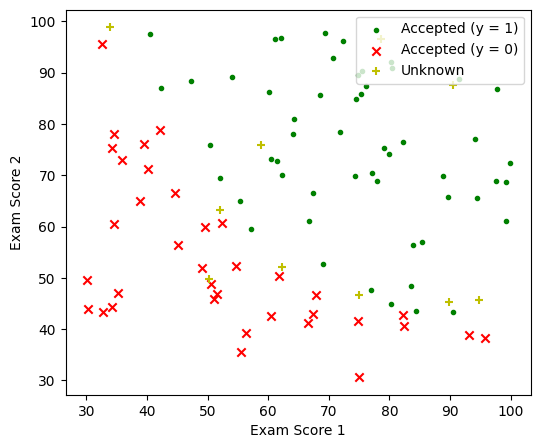

In [172]:
positive = y_train == 1
negative = y_train == 0

plt.figure(figsize=(6, 5))

plt.scatter(X_train[positive, 0], X_train[positive, 1], c='g', marker='.', label="Accepted (y = 1)")
plt.scatter(X_train[negative, 0], X_train[negative, 1], c='r', marker='x', label="Accepted (y = 0)")
plt.scatter(X_test[:, 0],         X_test[:, 1],         c='y', marker='+', label="Unknown")

plt.xlabel("Exam Score 1")
plt.ylabel("Exam Score 2")

plt.legend(loc='upper right')

plt.show()

In [197]:
classifier = KNNClassifier(n_neighbors=3, p=2).fit(X_train, y_train)
y_test_predicted, neighbours = classifier.predict(X_test)

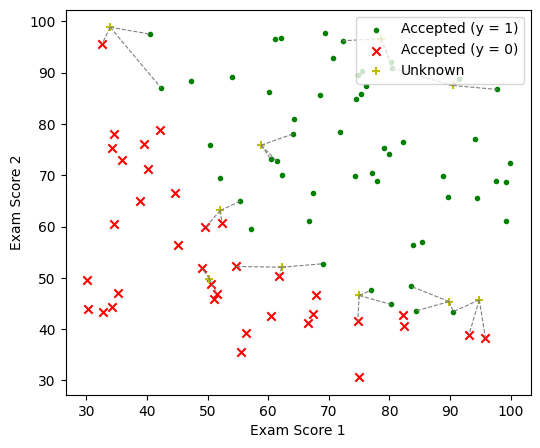

In [198]:
positive = y_train == 1
negative = y_train == 0

plt.figure(figsize=(6, 5))

plt.scatter(X_train[positive, 0], X_train[positive, 1], c='g', marker='.', label="Accepted (y = 1)")
plt.scatter(X_train[negative, 0], X_train[negative, 1], c='r', marker='x', label="Accepted (y = 0)")

plt.scatter(X_test[:, 0],         X_test[:, 1],         c='y', marker='+', label="Unknown")

for i in range(len(X_test)):
    for neighbor in neighbours[i]:
        plt.plot([X_test[i, 0], neighbor[0]], [X_test[i, 1], neighbor[1]], "--", color='gray', linewidth=0.8)

plt.xlabel("Exam Score 1")
plt.ylabel("Exam Score 2")

plt.legend(loc='upper right')

plt.show()

In [201]:
test_accuracy = accuracy_score(y_test, y_test_predicted)

print(f"Accuracy on Test Data: {round(test_accuracy * 100, 2)}%")

Accuracy on Test Data: 80.0%
